## **Collaborative Recommendations**

In [1]:
import pandas as pd

In [2]:
movies = pd.read_excel('../Data/Movie_Ratings.xlsx',0)
users = pd.read_excel('../Data/Movie_Ratings.xlsx','users')
ratings = pd.read_excel('../Data/Movie_Ratings.xlsx','ratings')

In [3]:
ratings

,User_ID,Movie_ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [4]:
X = ratings.pivot(index='User_ID',columns='Movie_ID',values='Rating').fillna(3)

In [5]:
## Fit SVD model on the dataset
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [6]:
X.shape

(943, 1682)

In [7]:
## View the U matrix
U_matrix = svd.transform(X)

In [8]:
user_df = pd.DataFrame(U_matrix, columns=['Latent Feature1', 'Latent Feature2'])
user_df

,Latent Feature1,Latent Feature2
0,127.325618,7.173036
1,124.145754,-2.173869
2,122.727835,-2.533030
3,123.802128,-2.822305
4,122.566026,0.754484
...,...,...
938,124.551607,-2.591706
939,124.295574,0.039667
940,123.591935,-2.361529
941,125.558040,1.714068


In [9]:
#View the sigma and VT
sigma = svd.singular_values_

In [10]:
sigma

array([3822.1590609 ,  100.21021734])

In [11]:
VT = svd.components_
VT

array([[ 0.02751476,  0.02434468,  0.02413305, ...,  0.0240913 ,
         0.02409975,  0.02409975],
       [ 0.06807088,  0.00836971, -0.00701444, ..., -0.01008346,
        -0.01038323, -0.01038323]], shape=(2, 1682))

In [50]:
VT_df = pd.DataFrame(VT, columns=X.columns)

In [51]:
VT_df.head()

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.027515,0.024345,0.024133,0.025100,0.024327,0.024231,0.026796,0.025988,0.026408,0.024741,...,0.024100,0.024109,0.024100,0.024091,0.024100,0.024083,0.024100,0.024091,0.024100,0.024100
1,0.068071,0.008370,-0.007014,0.051881,-0.004403,-0.009123,0.061829,0.073484,0.052806,0.007769,...,-0.010383,-0.009653,-0.010383,-0.010600,-0.010383,-0.009784,-0.010383,-0.010083,-0.010383,-0.010383


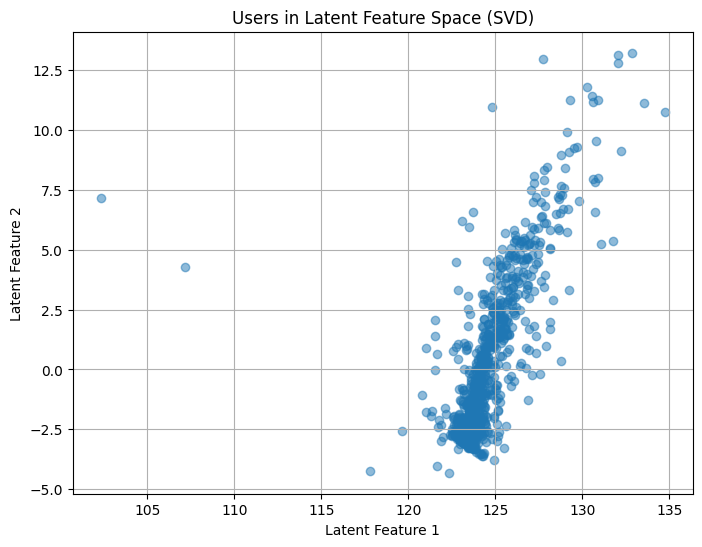

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(user_df['Latent Feature1'], user_df['Latent Feature2'], alpha=0.5)
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.title("Users in Latent Feature Space (SVD)")
plt.grid(True)
plt.show()


In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
user_df['Cluster'] = kmeans.fit_predict(user_df[['Latent Feature1', 'Latent Feature2']])


In [15]:
user_df

,Latent Feature1,Latent Feature2,Cluster
0,127.325618,7.173036,2
1,124.145754,-2.173869,1
2,122.727835,-2.533030,1
3,123.802128,-2.822305,1
4,122.566026,0.754484,0
...,...,...,...
938,124.551607,-2.591706,1
939,124.295574,0.039667,0
940,123.591935,-2.361529,1
941,125.558040,1.714068,0


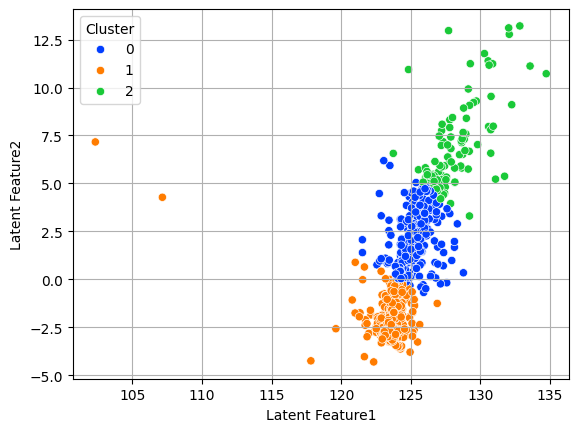

In [16]:
import seaborn as sns

sns.scatterplot(
    data=user_df,
    x='Latent Feature1',
    y='Latent Feature2',
    hue='Cluster',
    palette='bright'
)
plt.grid()
plt.show();

In [17]:
import numpy as np
predicted_ratings = user_df.iloc[:,:2].astype(float).values @ VT_df.astype(float).values

In [18]:
predicted_df = pd.DataFrame(
    predicted_ratings,
    index=user_df.index,
    columns=VT_df.columns
)

In [19]:
predicted_df

Movie_ID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,3.991608,3.159737,3.022440,3.568020,3.065830,3.019849,3.855268,3.836014,3.741184,3.205948,...,2.994036,3.000393,2.994036,2.991386,2.994036,2.996186,2.994036,2.995111,2.994036,2.994036
1,3.267863,3.004094,3.011264,3.003278,3.029628,3.028065,3.192152,3.066532,3.163637,3.054654,...,3.014453,3.013960,3.014453,3.013858,3.014453,3.011053,3.014453,3.012753,3.014453,3.014453
2,3.204401,2.966569,2.979564,2.949055,2.996716,2.996983,3.131952,3.003291,3.107227,3.016783,...,2.984011,2.983243,2.984011,2.983506,2.984011,2.980419,2.984011,2.982215,2.984011,2.984011
3,3.214269,2.990301,3.007519,2.961011,3.024123,3.025653,3.142852,3.009953,3.120321,3.041115,...,3.012904,3.011935,3.012904,3.012453,3.012904,3.009121,3.012904,3.011013,3.012904,3.012904
4,3.423733,2.990145,2.952599,3.115553,2.978305,2.963071,3.330879,3.240665,3.276554,3.038321,...,2.945976,2.947607,2.945976,2.944760,2.945976,2.944358,2.945976,2.945167,2.945976,2.945976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,3.250587,3.010477,3.023989,2.991787,3.041340,3.041711,3.177193,3.046376,3.152290,3.061450,...,3.028572,3.027778,3.028572,3.028064,3.028572,3.024915,3.028572,3.026744,3.028572,3.028572
939,3.422663,3.026268,2.999353,3.121879,3.023526,3.011502,3.333027,3.233084,3.284481,3.075559,...,2.995080,2.996204,2.995080,2.994003,2.995080,2.993004,2.995080,2.994042,2.995080,2.995080
940,3.239851,2.989041,2.999215,2.979641,3.016981,3.016357,3.165709,3.038350,3.139102,3.039494,...,3.003055,3.002420,3.003055,3.002505,3.003055,2.999551,3.003055,3.001303,3.003055,3.003055
941,3.571377,3.071016,3.018075,3.240437,3.046866,3.026818,3.470382,3.388934,3.406239,3.119803,...,3.008119,3.010476,3.008119,3.006669,3.008119,3.007026,3.008119,3.007573,3.008119,3.008119


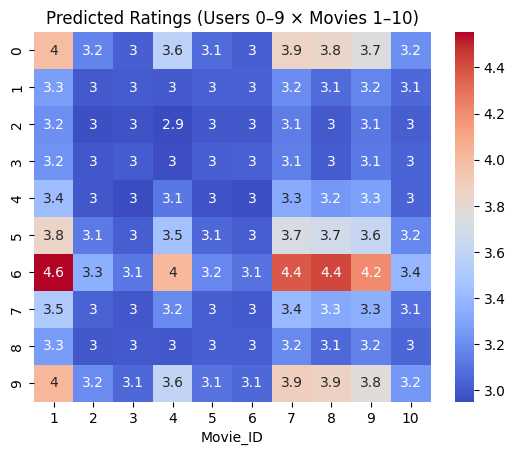

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(predicted_df.iloc[:10, :10], cmap='coolwarm', annot=True)
plt.title("Predicted Ratings (Users 0–9 × Movies 1–10)")
plt.show();

In [21]:
Sigma = np.diag(sigma)

In [22]:
Sigma

array([[3822.1590609 ,    0.        ],
       [   0.        ,  100.21021734]])

In [23]:
predicted_ratings = user_df.iloc[:,:2].astype(float).values @ Sigma @ VT_df.astype(float).values

In [24]:
predicted_df = pd.DataFrame(
    predicted_ratings,
    index=user_df.index,
    columns=VT_df.columns
)

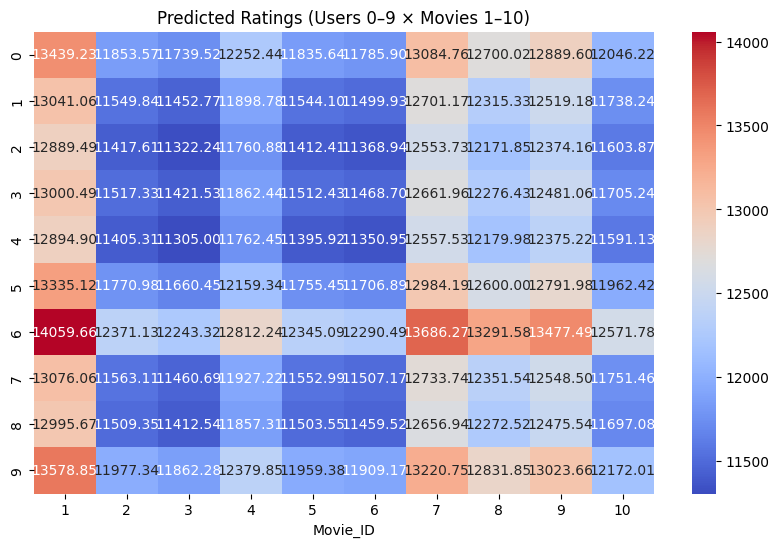

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(predicted_df.iloc[:10, :10], cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Predicted Ratings (Users 0–9 × Movies 1–10)")
plt.show();

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 5))
ratings_scaled = scaler.fit_transform(predicted_ratings)


In [27]:
predicted_df = pd.DataFrame(
    ratings_scaled,
    index=user_df.index,
    columns=VT_df.columns
)

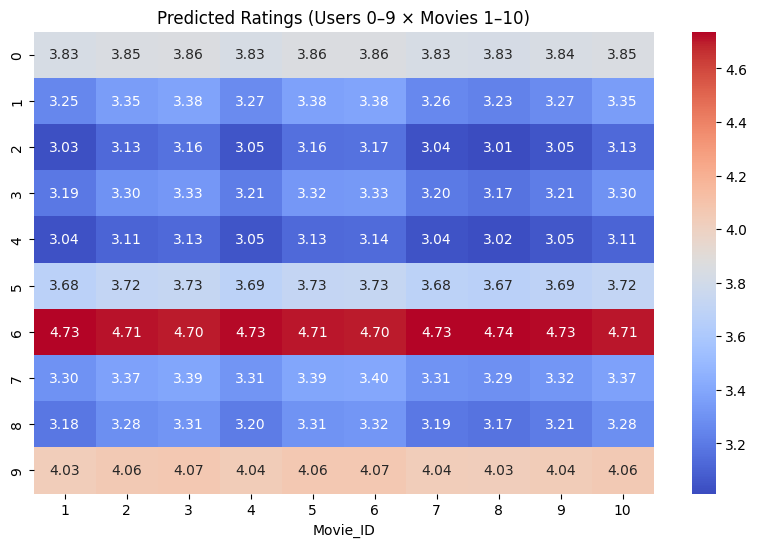

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(predicted_df.iloc[:10, :10], cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Predicted Ratings (Users 0–9 × Movies 1–10)")
plt.show();

In [29]:
## Fit the SVD model with 500 components/ features

svd500 = TruncatedSVD(n_components=500)
U500 = svd500.fit_transform(X)

In [30]:
U500.shape

(943, 500)

In [31]:
cum_var = np.cumsum(svd500.explained_variance_ratio_).round(2)

In [32]:
len(cum_var)

500

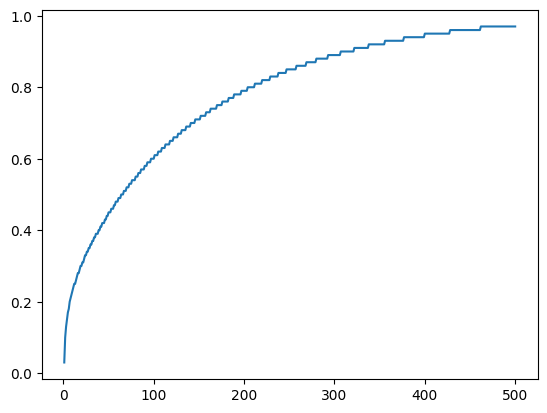

In [33]:
## Plot cum_var
sns.lineplot(
    data=pd.DataFrame(cum_var),
    x=range(1,501),
    y=cum_var
);

In [34]:
## Find the number of componets for cumulative sum > 85%
np.searchsorted(cum_var,0.8,side='left',)

np.int64(203)

In [35]:
## Suggest a good number of components (246)
svd250 = TruncatedSVD(n_components=np.searchsorted(cum_var,0.85,side='left'))
U250 = svd250.fit_transform(X)

## **Make Recommendations**

In [36]:
## Create new user with movie recommendations
vector_length = X.shape[1]
vector_length

1682

In [37]:
## Create an array with NaN values
new_user = np.full(shape=vector_length,fill_value=np.nan)

In [38]:
## Populate with 5 ratings
new_ratings = [5, 3, 5, 5, 4]
new_positions = [11, 14, 28, 63, 66]
new_user[new_positions] = new_ratings

In [39]:
## View the new user as a Dataframe
new_user_df = pd.DataFrame([new_user], columns=movies.Movie_Title)
new_user_df.index.name = None

In [40]:
new_user_df

Movie_Title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
U_new_user = svd250.transform(new_user_df.fillna(3))

/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


In [42]:
U_new_user.shape

(1, 246)

In [43]:
## Calculate the Sigma for new users
Sigma_new_user = svd250.singular_values_
Sigma_new_user.shape

(246,)

In [44]:
## Dervice the VT (componets) for the new user
VT_new_user = svd250.components_

In [45]:
VT_new_user

array([[ 0.02751476,  0.02434468,  0.02413305, ...,  0.0240913 ,
         0.02409975,  0.02409975],
       [ 0.06807163,  0.00836968, -0.00701458, ..., -0.01008345,
        -0.01038323, -0.01038323],
       [ 0.0993642 ,  0.03973147,  0.02068481, ..., -0.00130473,
        -0.001206  , -0.001206  ],
       ...,
       [ 0.0380856 ,  0.01574763,  0.00637503, ...,  0.00101197,
         0.0011248 ,  0.0011248 ],
       [-0.01360389, -0.0237457 ,  0.01096954, ...,  0.00079902,
        -0.00010937, -0.00010937],
       [-0.0147999 , -0.01067353,  0.04297679, ...,  0.00234539,
         0.00023462,  0.00023462]], shape=(246, 1682))

In [46]:
## Perform dot product between U_new_user and VT_new_user
new_user_recs = np.dot(U_new_user,VT_new_user)

In [47]:
new_user_recs

array([[3.01745795, 3.12052602, 3.08357733, ..., 3.00660944, 3.00399342,
        3.00399342]], shape=(1, 1682))

In [48]:
## Drop the rows where ratings are already available
# cols_dropped = new_user_df.dropna(axis=1).columns
# dropped_col_indices = [new_user_df.columns.get_loc(col) for col in cols_dropped]
# dropped_col_indices

In [49]:
new_user_recs_final = np.delete(new_user_recs,dropped_col_indices,axis=1)
new_user_recs_final.shape

NameError: name 'dropped_col_indices' is not defined

In [ ]:
new_user_recs_df = pd.DataFrame(new_user_recs.T, index=movies.Movie_Title,columns=['Recs'])

In [ ]:
top_recs = new_user_recs_df.sort_values('Recs',ascending=False)

In [ ]:
already_rated = new_user_df.T.dropna().index
already_rated

In [ ]:
top_recs_1 = top_recs[~top_recs.index.isin(already_rated)]

In [ ]:
top_10_recs_1 = top_recs_1.head(10)

In [ ]:
## Convert Sigma into a diagonal matrix
Sigma_new_user = np.diag(Sigma_new_user)

In [ ]:
Sigma_new_user.shape, VT_new_user.shape, U_new_user.shape

In [ ]:
## Perform dot product between U_new_user, Sigma and VT_new_user
new_user_recs_2 = U_new_user @ Sigma_new_user @ VT_new_user

In [ ]:
new_user_recs_2.reshape(-1,1)

In [ ]:
## Noemalize the values of the second new user array
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range=(1,5))
new_user_recs_2_norm = mm.fit_transform(new_user_recs_2.reshape(-1,1))

In [ ]:
top_recs.shape

In [ ]:
top_recs['Recs2'] = new_user_recs_2_norm

In [ ]:
top_recs

In [ ]:
top_recs_2 = top_recs[~top_recs.index.isin(already_rated)]

In [ ]:
top_recs_2.sort_values('Recs2',ascending=False).head(10)